In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

%matplotlib inline

# Total Cost - Phase 1

In [2]:
def fill_dataFrame_total(path, files):
    df_time = pd.DataFrame()
    df_prec = pd.DataFrame()
    df_conv = pd.DataFrame()
    for file in files:
        with open(os.path.join(path,file)) as f:
            col = "try_"+file.split('.')[0]
            for line in f:
                vals = line.split(' ')
                row = vals[1]+','+vals[2]
                
                try:
                    df_time.loc[row,col] += ' '+vals[3]
                except KeyError:
                    df_time.loc[row,col] = vals[3]
                except TypeError:
                    df_time.loc[row,col] = vals[3]
                    
                try:
                    df_prec.loc[row,col] += ' '+vals[4]
                except KeyError:
                    df_prec.loc[row,col] = vals[4]
                except TypeError:
                    df_prec.loc[row,col] = vals[4]
                
                try:
                    df_conv.loc[row,col] += ' '+vals[5][:-1]
                except KeyError:
                    df_conv.loc[row,col] = vals[5][:-1]
                except TypeError:
                    df_conv.loc[row,col] = vals[5][:-1]
            
    for i in range(len(df_time.index)):
        for j in range(len(df_time.columns)):
            df_time.iloc[i,j] = np.mean(list(map(float,df_time.iloc[i,j].split(' '))))
            
            df_prec.iloc[i,j] = np.mean(list(map(float,df_prec.iloc[i,j].split(' '))))
            
            lst = df_conv.iloc[i,j].split(' ')
            df_conv.iloc[i,j] = int(max(set(lst), key=lst.count))==1
            
    return df_time,df_prec,df_conv

In [3]:
def create_averageMatrix(df):
    surv_rate=["30%","40%","50%"]
    df_sep = pd.DataFrame()
    for idx, (name, row) in enumerate(df.iterrows()):
        idxs=name.split(',')
        df_sep.loc[idxs[0],surv_rate[idx%3]]=row.mean()
    return df_sep

## Sequential

In [4]:
path = "../results/total/phase1/sequential"
files = sorted(os.listdir(path))

In [5]:
df_seq_time,df_seq_prec,df_seq_conv = fill_dataFrame_total(path,files)
df_seq_avg=create_averageMatrix(df_seq_prec)

In [6]:
df_seq_time

,try_0,try_1,try_2
"3031,909",339.407,345.221,332.789
"3031,1212",345.294,348.365,299.753
"3031,1515",345.134,336.028,302.712
"3209,962",354.227,343.637,354.969
"3209,1283",363.904,343.562,367.816
"3209,1604",356.966,355.128,352.836
"3354,1006",398.041,391.581,398.465
"3354,1341",371.627,407.828,362.625
"3354,1677",345.003,366.146,372.692


In [7]:
df_seq_prec

,try_0,try_1,try_2
"3031,909",9931,10319,10385
"3031,1212",10841,11083,12276
"3031,1515",12025,12223,12794
"3209,962",10085,10575,9929
"3209,1283",11490,11154,11080
"3209,1604",11623,11928,12073
"3354,1006",9926,10321,9767
"3354,1341",10899,10452,11243
"3354,1677",12691,11858,12360


In [8]:
df_seq_conv

,try_0,try_1,try_2
"3031,909",True,True,True
"3031,1212",True,True,True
"3031,1515",True,True,True
"3209,962",True,True,True
"3209,1283",True,True,True
"3209,1604",True,True,True
"3354,1006",True,True,True
"3354,1341",True,True,True
"3354,1677",True,True,True


In [9]:
df_seq_avg

,30%,40%,50%
3031,10211.666667,11400.000000,12347.333333
3209,10196.333333,11241.333333,11874.666667
3354,10004.666667,10864.666667,12303.000000


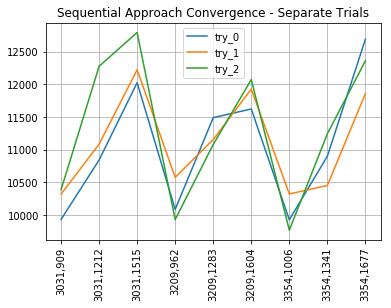

In [10]:
plt.plot(df_seq_prec)
plt.grid()
plt.legend(df_seq_prec.columns)
plt.xticks(rotation='vertical')
plt.title("Sequential Approach Convergence - Separate Trials");

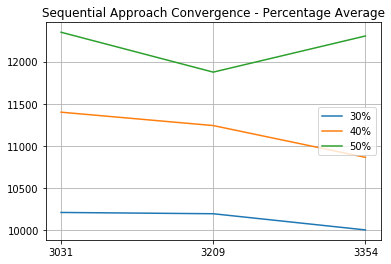

In [11]:
plt.plot(df_seq_avg)
plt.grid()
plt.legend(df_seq_avg.columns)
plt.title("Sequential Approach Convergence - Percentage Average");

## Parallel

In [12]:
path = "../results/total/phase1/parallel"
files = sorted(os.listdir(path))

In [13]:
df_par_time,df_par_prec,df_par_conv = fill_dataFrame_total(path,files)
df_par_avg=create_averageMatrix(df_par_prec)

In [14]:
df_par_time

,try_0,try_1,try_2
"3031,909",148.759,152.381,152.939
"3031,1212",143.996,146.483,152.194
"3031,1515",131.133,144.259,134.628
"3209,962",159.522,166.695,162.088
"3209,1283",159.903,171.817,163.489
"3209,1604",154.091,170.52,145.639
"3354,1006",173.596,177.165,186.892
"3354,1341",160.98,163.567,165.052
"3354,1677",164.264,163.924,159.343


In [15]:
df_par_prec

,try_0,try_1,try_2
"3031,909",10359,10264,9987
"3031,1212",11342,11340,11147
"3031,1515",12839,12203,12746
"3209,962",10312,10103,10100
"3209,1283",11263,11152,10772
"3209,1604",12079,11505,12687
"3354,1006",10232,10005,9873
"3354,1341",11824,11634,10784
"3354,1677",12144,12585,12273


In [16]:
df_par_conv

,try_0,try_1,try_2
"3031,909",True,True,True
"3031,1212",True,True,True
"3031,1515",True,True,True
"3209,962",True,True,True
"3209,1283",True,True,True
"3209,1604",True,True,True
"3354,1006",True,True,True
"3354,1341",True,True,True
"3354,1677",True,True,True


In [17]:
df_par_avg

,30%,40%,50%
3031,10203.333333,11276.333333,12596.000000
3209,10171.666667,11062.333333,12090.333333
3354,10036.666667,11414.000000,12334.000000


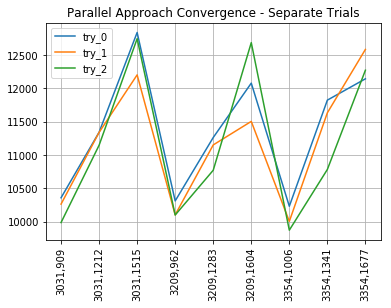

In [18]:
plt.plot(df_par_prec)
plt.grid()
plt.legend(df_par_prec.columns)
plt.xticks(rotation='vertical')
plt.title("Parallel Approach Convergence - Separate Trials");

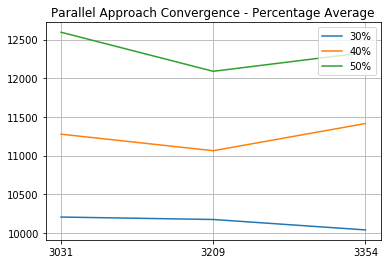

In [19]:
plt.plot(df_par_avg)
plt.grid()
plt.legend(df_par_avg.columns)
plt.title("Parallel Approach Convergence - Percentage Average");

## Parallel MPI

In [20]:
path = "../results/total/phase1/parallelMPI"
files = sorted(os.listdir(path))

In [21]:
df_mpi_time,df_mpi_prec,df_mpi_conv = fill_dataFrame_total(path,files)
df_mpi_avg=create_averageMatrix(df_mpi_prec)

In [22]:
df_mpi_time

,try_0,try_1,try_2
"3031,909",286.279,286.118,285.949
"3031,1212",265.851,266.002,265.715
"3031,1515",254.607,254.747,254.549
"3209,962",302.037,302.432,301.887
"3209,1283",286.189,286.212,286.13
"3209,1604",248.743,248.813,248.738
"3354,1006",306.958,306.884,306.744
"3354,1341",283.141,283.176,283.12
"3354,1677",260.309,260.341,260.143


In [23]:
df_mpi_prec

,try_0,try_1,try_2
"3031,909",7842.67,7918.33,7878.67
"3031,1212",8893.33,8801.67,8866.67
"3031,1515",9619,9741.67,9620.67
"3209,962",8162,8169.67,8219
"3209,1283",8751,8729.33,8625.33
"3209,1604",9910.67,10024,9917.67
"3354,1006",7937,7927.67,8022
"3354,1341",8887,8937.67,8978
"3354,1677",10279.7,10181.3,10245.7


In [24]:
df_mpi_conv

,try_0,try_1,try_2
"3031,909",True,True,True
"3031,1212",True,True,True
"3031,1515",True,True,True
"3209,962",True,True,True
"3209,1283",True,True,True
"3209,1604",True,True,True
"3354,1006",True,True,True
"3354,1341",True,True,True
"3354,1677",True,True,True


In [25]:
df_mpi_avg

,30%,40%,50%
3031,7879.888889,8853.888889,9660.444444
3209,8183.555556,8701.888889,9950.777778
3354,7962.222222,8934.222222,10235.555556


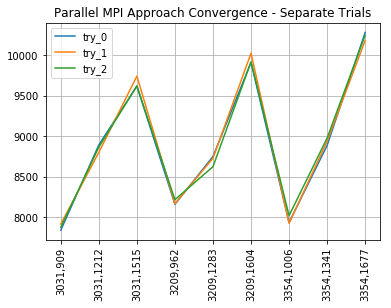

In [26]:
plt.plot(df_mpi_prec)
plt.grid()
plt.legend(df_mpi_prec.columns)
plt.xticks(rotation='vertical')
plt.title("Parallel MPI Approach Convergence - Separate Trials");

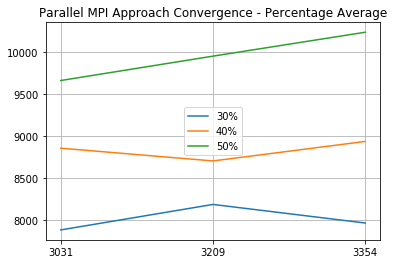

In [27]:
plt.plot(df_mpi_avg)
plt.grid()
plt.legend(df_mpi_avg.columns)
plt.title("Parallel MPI Approach Convergence - Percentage Average");

# Total Cost - Phase 2

## Sequential

In [ ]:
path = "../results/total/phase2/sequential"
files = sorted(os.listdir(path))

In [ ]:
df_seq_time,_,_ = fill_dataFrame_total(path,files)
df_seq_time

In [ ]:
plt.plot(df_seq_time)
plt.grid()
plt.legend(df_seq_time.columns)
plt.xticks(rotation='vertical')
plt.title("Sequential Total Computation Cost - Separate Trials");

## Parallel

In [ ]:
path = "../results/total/phase2/parallel"
files = sorted(os.listdir(path))

In [ ]:
df_par_time,_,_ = fill_dataFrame_total(path,files)
df_par_time

In [ ]:
plt.plot(df_par_time)
plt.grid()
plt.legend(df_par_time.columns)
plt.xticks(rotation='vertical')
plt.title("Parallel Total Computation Cost - Separate Trials");

## Parallel MPI

In [ ]:
path = "../results/total/phase2/parallelMPI"
files = sorted(os.listdir(path))

In [ ]:
df_mpi_time,_,_ = fill_dataFrame_total(path,files)
df_mpi_time

In [ ]:
plt.plot(df_mpi_time)
plt.grid()
plt.legend(df_mpi_time.columns)
plt.xticks(rotation='vertical')
plt.title("Parallel MPI Total Computation Cost - Separate Trials");

## Comparison

In [ ]:
plt.figure(figsize=(16,5))

plt.subplot(131)
plt.plot(df_seq_time)
plt.grid()
plt.legend(df_seq_time.columns)
plt.xticks(rotation='vertical')
plt.title("Sequential Total Computation Cost - Separate Trials");

plt.subplot(132)
plt.plot(df_par_time)
plt.grid()
plt.legend(df_par_time.columns)
plt.xticks(rotation='vertical')
plt.title("Parallel Total Computation Cost - Separate Trials");

plt.subplot(133)
plt.plot(df_mpi_time)
plt.grid()
plt.legend(df_mpi_time.columns)
plt.xticks(rotation='vertical')
plt.title("Parallel MPI Total Computation Cost - Separate Trials");

plt.tight_layout()

# Detailed Cost - Phase 3

In [28]:
def fill_dataFrame_detailed(path, files):
    df = pd.DataFrame()
    for file in files:
        with open(os.path.join(path,file)) as f:
            col = file.split('.')[0]
            for line in f:
                vals = line.split(' ')
                row = vals[0]+','+vals[1]+','+vals[2]
                try:
                    df.loc[row,col] += ' '+vals[3][:-1]
                except KeyError:
                    df.loc[row,col] = vals[3][:-1]
                except TypeError:
                    df.loc[row,col] = vals[3][:-1]
                    
    for i in range(len(df.index)):
        for j in range(len(df.columns)):
            df.iloc[i,j] = np.mean(list(map(float,df.iloc[i,j].split(' '))))
            
    return df

## Sequential

In [29]:
path = "../results/detailed/sequential"
genFiles = sorted([i for i in os.listdir(path) if "generation" in i])
pathFiles = sorted([i for i in os.listdir(path) if "path" in i])
rearrFiles = sorted([i for i in os.listdir(path) if "rearrange" in i])
sortFiles = sorted([i for i in os.listdir(path) if "sort" in i])

In [30]:
df_gen_seq = fill_dataFrame_detailed(path,genFiles)
df_gen_seq

,generation_0,generation_1,generation_2
"100,185,55",0.00056523,0.00055211,0.00050178
"200,442,132",0.00349537,0.00380623,0.00382193
"300,726,217",0.0113997,0.0111109,0.0111691
"400,1026,307",0.0230168,0.0221508,0.022481
"500,1340,402",0.0388959,0.0391952,0.03927
"600,1663,498",0.0605222,0.060792,0.0590094
"700,1995,598",0.0866398,0.0861573,0.0864146
"800,2334,700",0.118545,0.11894,0.118491
"900,2680,804",0.156468,0.154801,0.156328
"1000,3031,909",0.198957,0.198819,0.19803


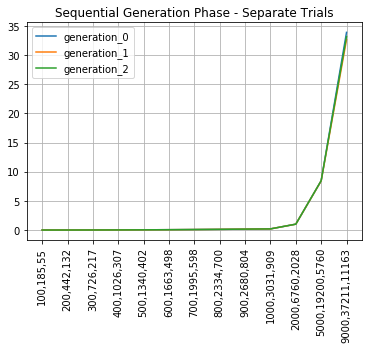

In [31]:
plt.plot(df_gen_seq)
plt.grid()
plt.legend(df_gen_seq.columns)
plt.xticks(rotation='vertical')
plt.title("Sequential Generation Phase - Separate Trials");

In [32]:
df_path_seq = fill_dataFrame_detailed(path,pathFiles)
df_path_seq

,path_0,path_1,path_2
"100,185,55",2.78515e-05,2.78713e-05,2.8198e-05
"200,442,132",0.000130842,0.000132495,0.000132515
"300,726,217",0.000350842,0.000349772,0.00034795
"400,1026,307",0.000691495,0.000687505,0.000685832
"500,1340,402",0.00114934,0.00116366,0.00115734
"600,1663,498",0.00172924,0.00173334,0.00173514
"700,1995,598",0.00245904,0.00242976,0.00249174
"800,2334,700",0.00341498,0.00341271,0.0033921
"900,2680,804",0.00456679,0.00453939,0.00460423
"1000,3031,909",0.00570965,0.00567551,0.00551907


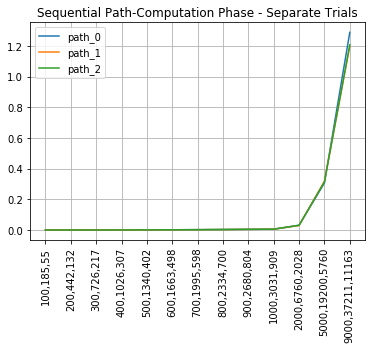

In [33]:
plt.plot(df_path_seq)
plt.grid()
plt.legend(df_path_seq.columns)
plt.xticks(rotation='vertical')
plt.title("Sequential Path-Computation Phase - Separate Trials");

In [34]:
df_sort_seq = fill_dataFrame_detailed(path, sortFiles)
df_sort_seq

,sort_0,sort_1,sort_2
"100,185,55",9.9703e-06,1.00495e-05,9.77228e-06
"200,442,132",2.4e-05,2.40693e-05,2.43861e-05
"300,726,217",4.14851e-05,4.14653e-05,4.14851e-05
"400,1026,307",5.85347e-05,5.86337e-05,5.8604e-05
"500,1340,402",7.84158e-05,7.85545e-05,7.85644e-05
"600,1663,498",9.67228e-05,9.62673e-05,9.65149e-05
"700,1995,598",0.000117257,0.000117287,0.000118168
"800,2334,700",0.000139218,0.000139545,0.000139525
"900,2680,804",0.000161564,0.000160594,0.000160871
"1000,3031,909",0.000182871,0.000183149,0.000183376


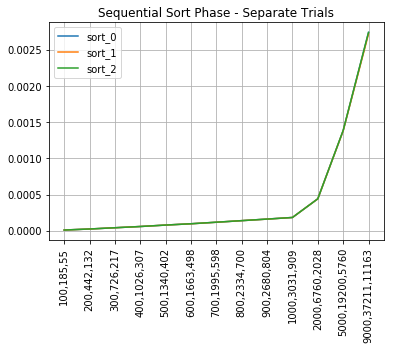

In [35]:
plt.plot(df_sort_seq)
plt.grid()
plt.legend(df_sort_seq.columns)
plt.xticks(rotation='vertical')
plt.title("Sequential Sort Phase - Separate Trials");

In [36]:
df_rearr_seq = fill_dataFrame_detailed(path, rearrFiles)
df_rearr_seq

,rearrange_0,rearrange_1,rearrange_2
"100,185,55",1.08911e-06,1.07921e-06,1.07921e-06
"200,442,132",7.12871e-06,7.13861e-06,7.24752e-06
"300,726,217",1.91782e-05,1.91485e-05,1.91584e-05
"400,1026,307",3.69109e-05,3.66436e-05,3.46535e-05
"500,1340,402",6.00396e-05,6.03465e-05,5.94257e-05
"600,1663,498",9.1099e-05,8.92475e-05,9.15743e-05
"700,1995,598",0.000126366,0.000125396,0.000127713
"800,2334,700",0.000193762,0.000177455,0.000173267
"900,2680,804",0.000259,0.000257347,0.000265406
"1000,3031,909",0.000405762,0.000405,0.00038901


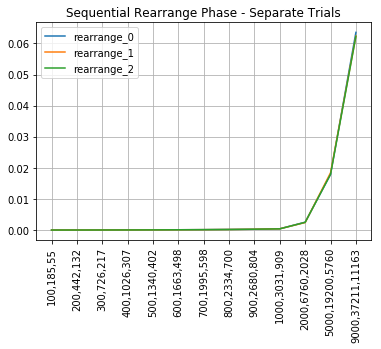

In [37]:
plt.plot(df_rearr_seq)
plt.grid()
plt.legend(df_rearr_seq.columns)
plt.xticks(rotation='vertical')
plt.title("Sequential Rearrange Phase - Separate Trials");

## Parallel

In [38]:
path = "../results/detailed/parallel"
genFiles = sorted([i for i in os.listdir(path) if "generation" in i])
pathFiles = sorted([i for i in os.listdir(path) if "path" in i])
rearrFiles = sorted([i for i in os.listdir(path) if "rearrange" in i])
sortFiles = sorted([i for i in os.listdir(path) if "sort" in i])

In [39]:
df_gen_par = fill_dataFrame_detailed(path,genFiles)
df_gen_par

,generation_0,generation_1,generation_2
"100,185,55",0.00049948,0.00050207,0.00050395
"200,442,132",0.00219286,0.00217313,0.00218617
"300,726,217",0.00541842,0.00547503,0.00545071
"400,1026,307",0.0108199,0.010543,0.0108286
"500,1340,402",0.0173653,0.0173695,0.0179983
"600,1663,498",0.0262968,0.0269825,0.0264132
"700,1995,598",0.0375376,0.0365777,0.0369734
"800,2334,700",0.0505974,0.0504549,0.0509916
"900,2680,804",0.0681611,0.0664941,0.0682702
"1000,3031,909",0.083461,0.0876217,0.0847994


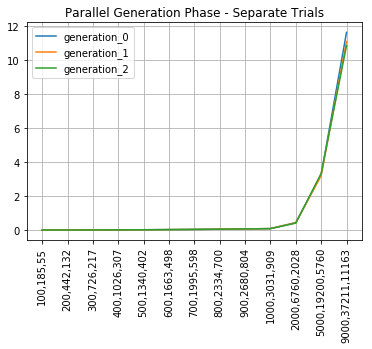

In [40]:
plt.plot(df_gen_par)
plt.grid()
plt.legend(df_gen_par.columns)
plt.xticks(rotation='vertical')
plt.title("Parallel Generation Phase - Separate Trials");

In [41]:
df_path_par = fill_dataFrame_detailed(path, pathFiles)
df_path_par

,path_0,path_1,path_2
"100,185,55",4.88416e-05,4.76436e-05,4.83663e-05
"200,442,132",6.31089e-05,6.1604e-05,6.08812e-05
"300,726,217",9.27624e-05,9.13366e-05,9.4802e-05
"400,1026,307",0.000143455,0.000146248,0.000148901
"500,1340,402",0.000212752,0.000210416,0.000214861
"600,1663,498",0.000326564,0.000320921,0.000326624
"700,1995,598",0.000424475,0.000425426,0.000419842
"800,2334,700",0.000585396,0.000579198,0.000578594
"900,2680,804",0.000726733,0.000770911,0.000753921
"1000,3031,909",0.000911347,0.000962564,0.000919832


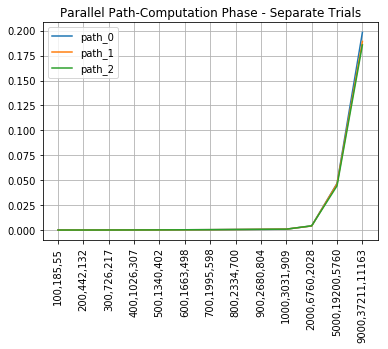

In [42]:
plt.plot(df_path_par)
plt.grid()
plt.legend(df_path_par.columns)
plt.xticks(rotation='vertical')
plt.title("Parallel Path-Computation Phase - Separate Trials");

In [43]:
df_sort_par = fill_dataFrame_detailed(path, sortFiles)
df_sort_par

,sort_0,sort_1,sort_2
"100,185,55",0.000151416,0.000152861,0.000152842
"200,442,132",0.000151327,0.00016296,0.00016096
"300,726,217",0.000169287,0.000166089,0.000189337
"400,1026,307",0.000234366,0.000258832,0.000202842
"500,1340,402",0.000388851,0.000391911,0.000382832
"600,1663,498",0.000555485,0.000574129,0.000593317
"700,1995,598",0.000811,0.000752446,0.000895683
"800,2334,700",0.00104744,0.000922683,0.00076003
"900,2680,804",0.000956525,0.000934861,0.00093695
"1000,3031,909",0.000918089,0.000753257,0.000779733


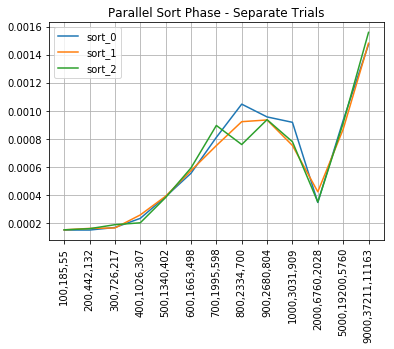

In [44]:
plt.plot(df_sort_par)
plt.grid()
plt.legend(df_sort_par.columns)
plt.xticks(rotation='vertical')
plt.title("Parallel Sort Phase - Separate Trials");

In [45]:
df_rearr_par = fill_dataFrame_detailed(path, rearrFiles)
df_rearr_par

,rearrange_0,rearrange_1,rearrange_2
"100,185,55",6.14851e-06,6.10891e-06,5.79208e-06
"200,442,132",3.09307e-05,2.93663e-05,3.04554e-05
"300,726,217",7.8604e-05,7.38614e-05,7.4297e-05
"400,1026,307",0.000148228,0.000139802,0.000141644
"500,1340,402",0.000230713,0.000229743,0.00023802
"600,1663,498",0.000348792,0.000339525,0.000348178
"700,1995,598",0.000477782,0.000470347,0.000470881
"800,2334,700",0.000627099,0.000607851,0.000595455
"900,2680,804",0.000734693,0.000748109,0.000733188
"1000,3031,909",0.000897109,0.000897347,0.000898584


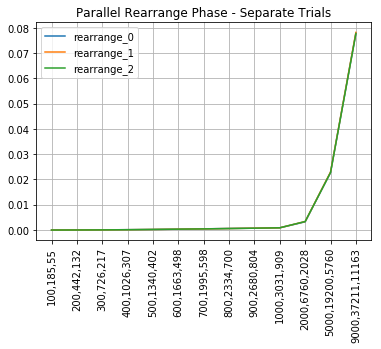

In [46]:
plt.plot(df_rearr_par)
plt.grid()
plt.legend(df_rearr_par.columns)
plt.xticks(rotation='vertical')
plt.title("Parallel Rearrange Phase - Separate Trials");

## Parallel MPI

In [47]:
path = "../results/detailed/parallelMPI"
genFiles = sorted([i for i in os.listdir(path) if "generation" in i])
pathFiles = sorted([i for i in os.listdir(path) if "path" in i])
rearrFiles = sorted([i for i in os.listdir(path) if "rearrange" in i])
sortFiles = sorted([i for i in os.listdir(path) if "sort" in i])
transFiles = sorted([i for i in os.listdir(path) if "transfer" in i])

In [48]:
df_gen_mpi = fill_dataFrame_detailed(path, genFiles)
df_gen_mpi

,generation_0,generation_1,generation_2
"100,185,55",0.00049627,0.00049203,0.000500227
"200,442,132",0.0021908,0.00221251,0.00218129
"300,726,217",0.00547511,0.00547565,0.0055057
"400,1026,307",0.010481,0.0107003,0.010492
"500,1340,402",0.0176836,0.0175157,0.0176592
"600,1663,498",0.0264755,0.0266044,0.0265024
"700,1995,598",0.0372764,0.0375759,0.037351
"800,2334,700",0.0510121,0.0515986,0.0507607
"900,2680,804",0.067563,0.0681778,0.0674828
"1000,3031,909",0.0852611,0.0881653,0.0875502


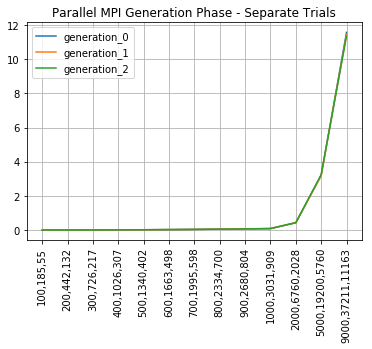

In [49]:
plt.plot(df_gen_mpi)
plt.grid()
plt.legend(df_gen_mpi.columns)
plt.xticks(rotation='vertical')
plt.title("Parallel MPI Generation Phase - Separate Trials");

In [50]:
df_path_mpi = fill_dataFrame_detailed(path, pathFiles)
df_path_mpi

,path_0,path_1,path_2
"100,185,55",4.79802e-05,4.7495e-05,4.72475e-05
"200,442,132",6.15677e-05,6.18449e-05,6.11551e-05
"300,726,217",9.42112e-05,9.33234e-05,9.30825e-05
"400,1026,307",0.000145584,0.000148795,0.000145274
"500,1340,402",0.000214149,0.000210502,0.000211762
"600,1663,498",0.00031702,0.000310752,0.000324182
"700,1995,598",0.000419822,0.000422875,0.000420191
"800,2334,700",0.000593789,0.000550333,0.000568106
"900,2680,804",0.000758937,0.000730416,0.000758977
"1000,3031,909",0.000923515,0.000912888,0.000911861


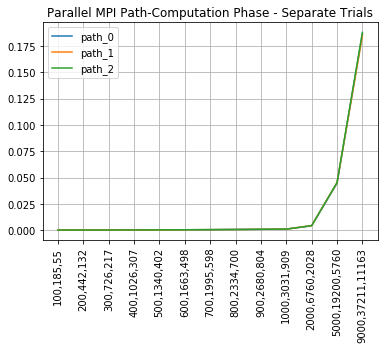

In [51]:
plt.plot(df_path_mpi)
plt.grid()
plt.legend(df_path_mpi.columns)
plt.xticks(rotation='vertical')
plt.title("Parallel MPI Path-Computation Phase - Separate Trials");

In [52]:
df_sort_mpi = fill_dataFrame_detailed(path, sortFiles)
df_sort_mpi

,sort_0,sort_1,sort_2
"100,185,55",0.000150634,0.000151043,0.000148073
"200,442,132",0.000157069,0.000166112,0.000158591
"300,726,217",0.000180538,0.000194769,0.000185548
"400,1026,307",0.000240518,0.000198696,0.000251686
"500,1340,402",0.000348145,0.00042268,0.000394974
"600,1663,498",0.000686802,0.000528845,0.00062271
"700,1995,598",0.000807198,0.00103415,0.000811053
"800,2334,700",0.00100933,0.00100207,0.000935779
"900,2680,804",0.000972637,0.000858099,0.00105895
"1000,3031,909",0.00077965,0.000831426,0.000811063


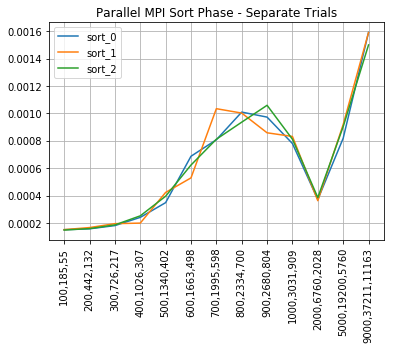

In [53]:
plt.plot(df_sort_mpi)
plt.grid()
plt.legend(df_sort_mpi.columns)
plt.xticks(rotation='vertical')
plt.title("Parallel MPI Sort Phase - Separate Trials");

In [54]:
df_rearr_mpi = fill_dataFrame_detailed(path, rearrFiles)
df_rearr_mpi

,rearrange_0,rearrange_1,rearrange_2
"100,185,55",6.10561e-06,6.22442e-06,6.20462e-06
"200,442,132",2.94191e-05,2.92079e-05,2.86799e-05
"300,726,217",7.54653e-05,7.39934e-05,7.4297e-05
"400,1026,307",0.000140261,0.000144106,0.000138162
"500,1340,402",0.000240406,0.000235515,0.000231426
"600,1663,498",0.000340462,0.000342287,0.000346637
"700,1995,598",0.000464218,0.000469779,0.00047232
"800,2334,700",0.000606779,0.000602795,0.000606851
"900,2680,804",0.000738917,0.000746954,0.000733653
"1000,3031,909",0.000899974,0.000898591,0.000903059


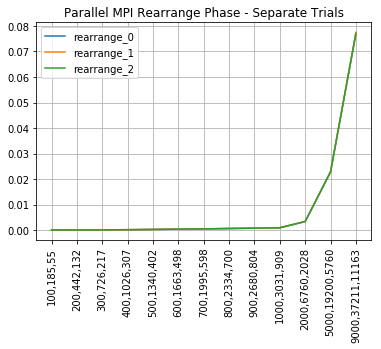

In [55]:
plt.plot(df_rearr_mpi)
plt.grid()
plt.legend(df_rearr_mpi.columns)
plt.xticks(rotation='vertical')
plt.title("Parallel MPI Rearrange Phase - Separate Trials");

In [56]:
df_trans_mpi = fill_dataFrame_detailed(path, transFiles)
df_trans_mpi

,transfer_0,transfer_1,transfer_2
"100,185,55",0.00352493,0.00356759,0.00351381
"200,442,132",0.00351289,0.00322044,0.00361741
"300,726,217",0.00430785,0.00416989,0.004002
"400,1026,307",0.00567733,0.00407574,0.00549622
"500,1340,402",0.00453941,0.00621711,0.00502619
"600,1663,498",0.00681341,0.00717704,0.0070463
"700,1995,598",0.01182,0.00771093,0.0112291
"800,2334,700",0.0155024,0.00963474,0.0190917
"900,2680,804",0.0155851,0.0100037,0.0133413
"1000,3031,909",0.0420961,0.0110855,0.0193101


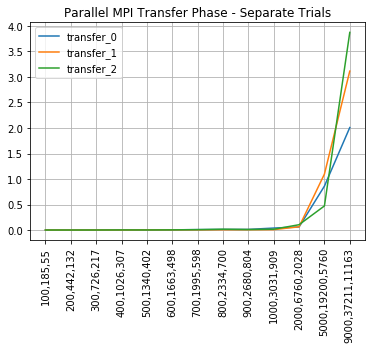

In [57]:
plt.plot(df_trans_mpi)
plt.grid()
plt.legend(df_trans_mpi.columns)
plt.xticks(rotation='vertical')
plt.title("Parallel MPI Transfer Phase - Separate Trials");

## Comparison

### Generation Phase

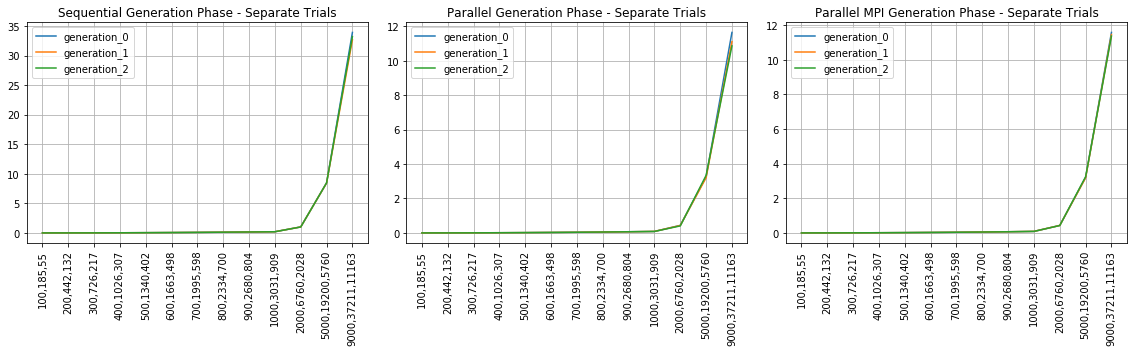

In [58]:
plt.figure(figsize=(16,5))

plt.subplot(131)
plt.plot(df_gen_seq)
plt.grid()
plt.legend(df_gen_seq.columns)
plt.xticks(rotation='vertical')
plt.title("Sequential Generation Phase - Separate Trials");

plt.subplot(132)
plt.plot(df_gen_par)
plt.grid()
plt.legend(df_gen_par.columns)
plt.xticks(rotation='vertical')
plt.title("Parallel Generation Phase - Separate Trials");

plt.subplot(133)
plt.plot(df_gen_mpi)
plt.grid()
plt.legend(df_gen_mpi.columns)
plt.xticks(rotation='vertical')
plt.title("Parallel MPI Generation Phase - Separate Trials");

plt.tight_layout()

### Path Computation Phase

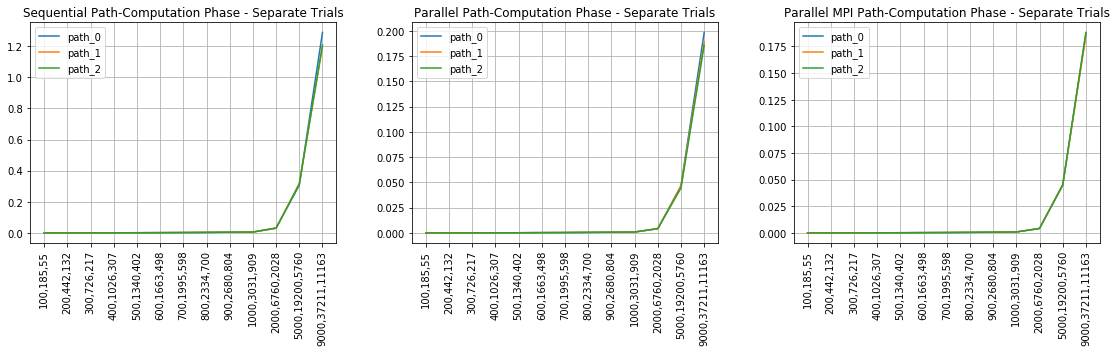

In [59]:
plt.figure(figsize=(16,5))

plt.subplot(131)
plt.plot(df_path_seq)
plt.grid()
plt.legend(df_path_seq.columns)
plt.xticks(rotation='vertical')
plt.title("Sequential Path-Computation Phase - Separate Trials");

plt.subplot(132)
plt.plot(df_path_par)
plt.grid()
plt.legend(df_path_par.columns)
plt.xticks(rotation='vertical')
plt.title("Parallel Path-Computation Phase - Separate Trials");

plt.subplot(133)
plt.plot(df_path_mpi)
plt.grid()
plt.legend(df_path_mpi.columns)
plt.xticks(rotation='vertical')
plt.title("Parallel MPI Path-Computation Phase - Separate Trials");

plt.tight_layout()

### Sorting Phase

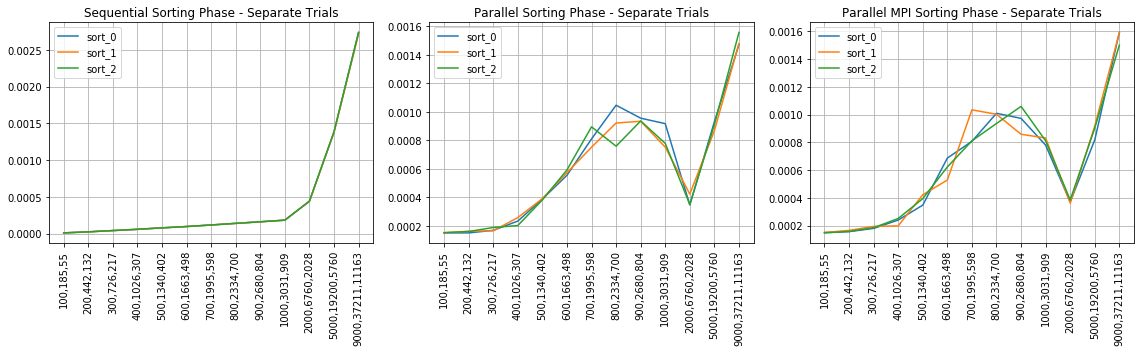

In [60]:
plt.figure(figsize=(16,5))

plt.subplot(131)
plt.plot(df_sort_seq)
plt.grid()
plt.legend(df_sort_seq.columns)
plt.xticks(rotation='vertical')
plt.title("Sequential Sorting Phase - Separate Trials");

plt.subplot(132)
plt.plot(df_sort_par)
plt.grid()
plt.legend(df_sort_par.columns)
plt.xticks(rotation='vertical')
plt.title("Parallel Sorting Phase - Separate Trials");

plt.subplot(133)
plt.plot(df_sort_mpi)
plt.grid()
plt.legend(df_sort_mpi.columns)
plt.xticks(rotation='vertical')
plt.title("Parallel MPI Sorting Phase - Separate Trials");

plt.tight_layout()

### Rearrange Phase

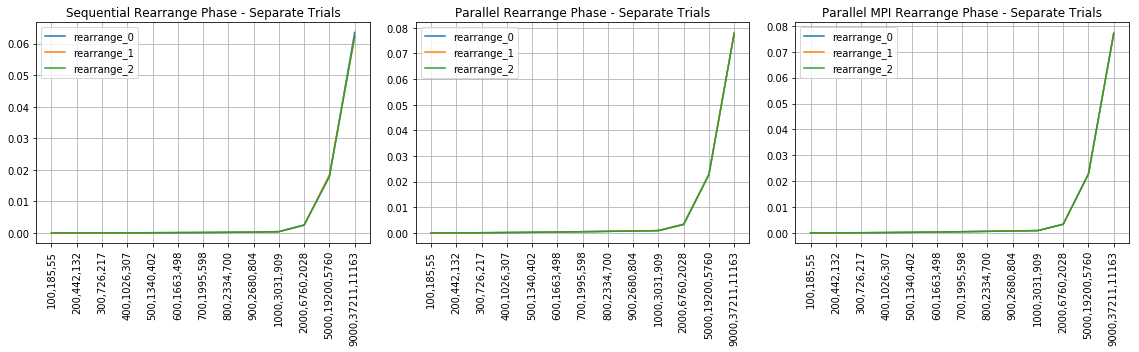

In [61]:
plt.figure(figsize=(16,5))

plt.subplot(131)
plt.plot(df_rearr_seq)
plt.grid()
plt.legend(df_rearr_seq.columns)
plt.xticks(rotation='vertical')
plt.title("Sequential Rearrange Phase - Separate Trials");

plt.subplot(132)
plt.plot(df_rearr_par)
plt.grid()
plt.legend(df_rearr_par.columns)
plt.xticks(rotation='vertical')
plt.title("Parallel Rearrange Phase - Separate Trials");

plt.subplot(133)
plt.plot(df_rearr_mpi)
plt.grid()
plt.legend(df_rearr_mpi.columns)
plt.xticks(rotation='vertical')
plt.title("Parallel MPI Rearrange Phase - Separate Trials");

plt.tight_layout()